# The Hazard of Small Asteroids
### A tool to produce simple graphical and numerical output of the evolution of the asteroid in the atmosphere

Import the required library for this software. 

In [1]:
# running notebook from acs-armageddon-metis
# solver.py is within armageddon directory
from armageddon import solver
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Solver

The solver module simulates an asteroid entering the atmosphere of a planet and models its trajectory by solving a system of ordinary differential equations (ODEs) that describes how the velocity, mass, angle from horizontal, and radius of the meteorite changes over time. 

It can then compute the energy lost per unit height to find the burst energy and burst altitude if it is an airburst event, residual kinetic energy, and horizontal distance between the entry and landing point.
<br>

### Initialise Planet object
Set the parameters of the planet which was hit by the asteroid.

The physical parameters used are shown below. 


- `Cd` : float, optional, The drag coefficient

- `Ch` : float, optional, The heat transfer coefficient

- `Q` : float, optional, The heat of ablation (J/kg)

- `Cl` : float, optional, Lift coefficient

- `alpha` : float, optional, Dispersion coefficient

- `Rp` : float, optional, Planet radius (m)

- `rho0` : float, optional, Air density at zero altitude (kg/m^3)

- `g` : float, optional, Surface gravity (m/s^2)

- `H` : float, optional, Atmospheric scale height (m) 

Some physical parameters are set with default values as shown below, which can be changed:

- `Cd = 1.`

- `Ch = 0.1`

- `Q = 1e7`

- `Cl = 1e-3`

- `alpha = 0.3`

- `Rp = 6371e3`

- `g = 9.81`

- `H = 8000.`

- `rho0 = 1.2`

In [3]:
earth = solver.Planet()

### Solve Atmospheric Entry

The function `solve_atmospheric_entry` solves the system of ODEs for a given impact scenario. Input parameters include: 
<br>
- `radius` : radius of the asteroid in $m$
- `velocity` : entry velocity in $ms^{-1}$
- `density` : density of the asteroid in $kgm^{-3}$
- `strength` : strength of the asteroid in $Nm^{-2}$
- `angle` : angle of entry to atmosphere from horizontal in degrees (default)
- `init_altitude` : altitude when simulation starts in $m$ (default `init_altitude = 100e3`)
- `dt` : time step size in $s$ (default `dt = 0.005`)
- `radians` : degrees is used in angle (default `radians = False`)

RK4 ODE time-stepping solver is used to achieve higher convergence rate (fourth-order accuracy) and greater stability.

The function returns a dataframe with velocity, mass, angle, altitute, distance, and radius of the meteorite over each time step. 

Iteration stops either immediately before impact or 10,000 iterations has been carried out. Therefore, altitude values are always greater than zero, and the maximum number of rows in the dataframe is 10,000.

## Estimated impact scenario

- radius = 65 m
- density = 3200 kg/m^3
- strength = 3 MPa
- angle = 15 degrees
- speed = 19 km/s

In [3]:
df = earth.solve_atmospheric_entry(radius=65, angle=15,
                                       strength=3e6, density=3200,
                                       velocity=19e3, dt=0.05)

df.head()

,velocity,mass,angle,altitude,distance,radius,time
0,19000.000000,3.681109e+09,15.000000,100000.000000,0.000000,65.0,0.00
1,19000.126775,3.681109e+09,14.993304,99754.174711,903.483211,65.0,0.05
2,19000.253491,3.681109e+09,14.986606,99508.455040,1807.035050,65.0,0.10
3,19000.380146,3.681109e+09,14.979909,99262.841000,2710.655495,65.0,0.15
4,19000.506741,3.681108e+09,14.973211,99017.332609,3614.344524,65.0,0.20


### Calculate Energy

The function `calculate_energy` computes the kinetic energy lost per unit altitude in kilotons TNT per km for a given impact scenario. 

It gives out a dataframe with columns for the velocity, mass, angle, altitude, horizontal distance, radius and an additional dedz (the kinetic energy lost per unit altitude calculated using this function).

In [4]:
result = earth.calculate_energy(df)
result

,velocity,mass,angle,altitude,distance,radius,time,dedz
0,19000.000000,3.681109e+09,15.000000,100000.000000,0.000000,65.000000,0.00,0.000000
1,19000.126775,3.681109e+09,14.993304,99754.174711,903.483211,65.000000,0.05,0.028288
2,19000.253491,3.681109e+09,14.986606,99508.455040,1807.035050,65.000000,0.10,0.029184
3,19000.380146,3.681109e+09,14.979909,99262.841000,2710.655495,65.000000,0.15,0.030107
4,19000.506741,3.681108e+09,14.973211,99017.332609,3614.344524,65.000000,0.20,0.031060
...,...,...,...,...,...,...,...,...
2293,102.561028,5.995709e+08,89.663884,24.579723,367129.381848,564.855177,114.65,1.507497
2294,102.525594,5.995706e+08,89.665195,19.452646,367129.411867,564.855177,114.70,1.507420
2295,102.490186,5.995703e+08,89.666499,14.327338,367129.441758,564.855177,114.75,1.507344
2296,102.454804,5.995700e+08,89.667798,9.203800,367129.471523,564.855177,114.80,1.507267


How the velocity, mass, radius, and kinetic energy lost per unit altitude changes as it descends onto Earth can be easily visualised.

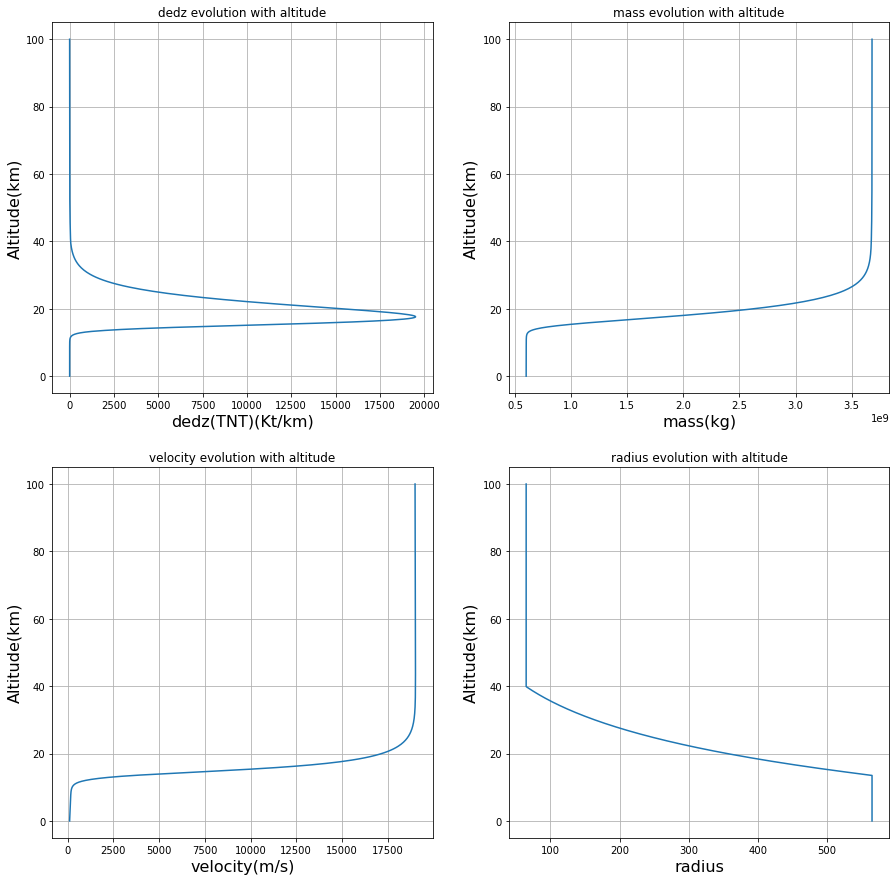

In [5]:
altitude = result['altitude'].to_numpy(dtype=float)
altitude = altitude / 1000

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221)
dedz=result['dedz'].to_numpy(dtype=float)
plt.title('dedz evolution with altitude')
ax1.set_xlabel('dedz(TNT)(Kt/km)',fontsize=16)
ax1.set_ylabel('Altitude(km)',fontsize=16)
plt.grid(True)
ax1.plot(dedz,altitude)

ax2 = plt.subplot(222)
mass=result['mass'].to_numpy(dtype=float)
plt.title('mass evolution with altitude')
ax2.set_xlabel('mass(kg)',fontsize=16)
ax2.set_ylabel('Altitude(km)',fontsize=16)
plt.grid(True)
ax2.plot(mass,altitude)

ax3 = plt.subplot(223)
velocity=result['velocity'].to_numpy(dtype=float)
plt.title('velocity evolution with altitude')
ax3.set_xlabel('velocity(m/s)',fontsize=16)
ax3.set_ylabel('Altitude(km)',fontsize=16)
plt.grid(True)
ax3.plot(velocity,altitude)

ax4 = plt.subplot(224)
radius=result['radius'].to_numpy(dtype=float)
plt.title('radius evolution with altitude')
ax4.set_xlabel('radius',fontsize=16)
ax4.set_ylabel('Altitude(km)',fontsize=16)
plt.grid(True)
ax4.plot(radius,altitude)

### Analyse Outcome

The function `analyse_outcome` inspects a dataframe obtained from `calculate_energy` to classify the type of event (airburst vs cratering), find the peak in dedz, the altitude of the peak, horizontal distance of the peak from the entry point, and the burst energy. 

The output is in a dictionary with the keys `outcome` for classification, `burst_peak_dedz`, `burst_altitude` and `burst_distance` quantifying the dedz peak, and `burst_energy` for magnitude of burst energy.

In [6]:
outcome = earth.analyse_outcome(result)
outcome

{'outcome': 'Airburst',
 'burst_peak_dedz': 19507.604546636427,
 'burst_altitude': 17725.07395051766,
 'burst_distance': 332716.06167068525,
 'burst_energy': 107466.63948873624}

### Numerical solution vs. Analytical solution

With some approximations on the planet and its atmosphere, an analytical solution can be derived:

```
a = (-rho0 * np.pi * r0**2 * H) / (np.sin(theta0) * 2 * m0)
velocity_analytic = np.exp(a * np.exp(-altitude / H)) * (v0 / (np.exp(a * np.exp(-z0 / H))))
```

`solver_analytic` gives out the velocity values from the analytical solution, as well as a dataframe containing the velocity values over a range of altitudes obtained from the RK4 solver. The two sets of velocity values can be compared to examine the accuracy of the ODE solver.

It takes the following parameters as input:

- `v0` : initial velocity in $ms^{-1}$
- `z0 = 100000` : initial altitude in $m$
- `rho0 = 1.2` : atmospheric density at zero altitude in $kgm^{-3}$
- `theta0` : angle from horizontal in degrees when meteorite enters the atmosphere
- `r0` : initial radius of meteorite in $m$
- `rhom` : density of meteorite in $kgm^{-3}$
- `dt` : time step size (default `dt = 0.05`)
- `H` : atmospheric scale height in $m$ (default `H = 8000`)

Input parameters from the asteroid concerned into this function, the numerical and analytical solution can be plotted and compared.

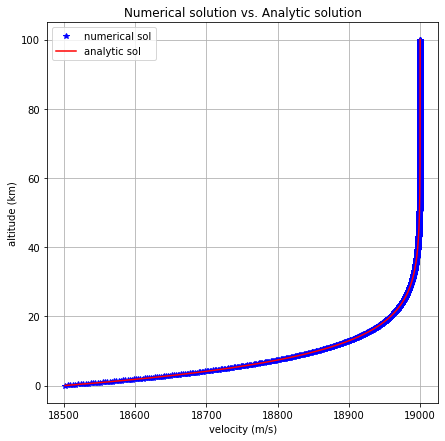

In [5]:
df2, analytic_answer = earth.solver_analytic(19e3, 100e3, 1.2, 15, 65, 3200, 0.005)
altitude2 = df2['altitude'].to_numpy(dtype=float)
velocity2 = df2['velocity'].to_numpy(dtype=float)
altitude2 = altitude2/1000
fig = plt.figure(figsize=(7,7))
plt.plot(velocity2, altitude2, 'b*', label='numerical sol')
plt.plot(analytic_answer, altitude2, 'r-', label='analytic sol')
plt.xlabel('velocity (m/s)')
plt.ylabel('altitude (km)')
plt.title('Numerical solution vs. Analytic solution')
plt.legend(loc='best')
plt.grid(True)
plt.show()

### Extension 1


The default option uses an exponential atmospheric density function to approximate atmospheric density over altitude based on density at zero altitude.

For more accurate densities, real-world data can be used. When `atmos_func = 'tabular'`, values are taken from a dataset originated from NASA: `atmo_filename: './armageddon/resources/AltitudeDensityTable.csv'`

{'outcome': 'Airburst', 'burst_peak_dedz': 23823.736858601816, 'burst_altitude': 15583.302997908613, 'burst_distance': 342358.4788219165, 'burst_energy': 111078.89322015617}


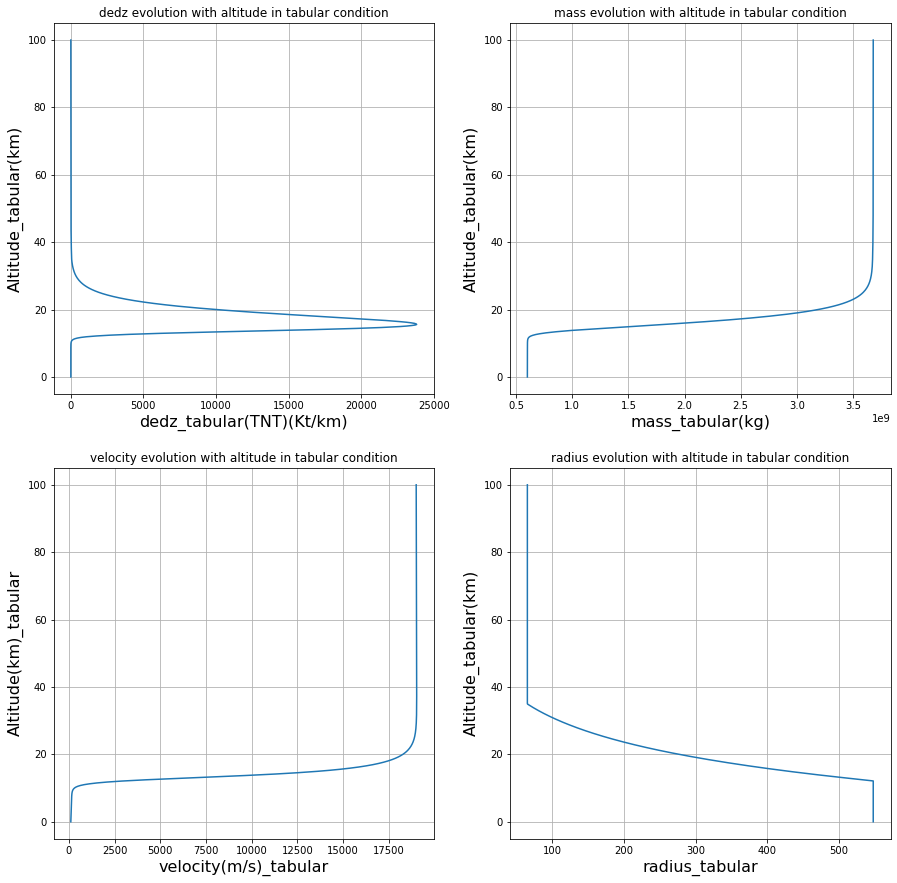

In [8]:
# atmo_filename is different because this notebook is run locally
earth = solver.Planet(atmos_func='tabular')

df_tabular = earth.solve_atmospheric_entry(radius=65, angle=15,
                                       strength=3e6, density=3200,
                                       velocity=19e3, dt=0.05)

result_tabular = earth.calculate_energy(df_tabular)
altitude_tabular = result_tabular['altitude'].to_numpy(dtype=float)
altitude_tabular = altitude_tabular/1000

outcome_tabular = earth.analyse_outcome(result_tabular)
print(outcome_tabular)

fig = plt.figure(figsize=(15, 15))
ax1 = plt.subplot(221)
dedz_tabular=result_tabular['dedz'].to_numpy(dtype=float)
plt.title('dedz evolution with altitude in tabular condition')
ax1.set_xlabel('dedz_tabular(TNT)(Kt/km)',fontsize=16)
ax1.set_ylabel('Altitude_tabular(km)',fontsize=16)
plt.grid(True)
ax1.plot(dedz_tabular,altitude_tabular)

ax2 = plt.subplot(222)
mass_tabular=result_tabular['mass'].to_numpy(dtype=float)
plt.title('mass evolution with altitude in tabular condition')
ax2.set_xlabel('mass_tabular(kg)',fontsize=16)
ax2.set_ylabel('Altitude_tabular(km)',fontsize=16)
plt.grid(True)
ax2.plot(mass_tabular,altitude_tabular)

ax3 = plt.subplot(223)
velocity_tabular=result_tabular['velocity'].to_numpy(dtype=float)
plt.title('velocity evolution with altitude in tabular condition')
ax3.set_xlabel('velocity(m/s)_tabular',fontsize=16)
ax3.set_ylabel('Altitude(km)_tabular',fontsize=16)
plt.grid(True)
ax3.plot(velocity_tabular,altitude_tabular)

ax4 = plt.subplot(224)
radius_tabular=result_tabular['radius'].to_numpy(dtype=float)
plt.title('radius evolution with altitude in tabular condition')
ax4.set_xlabel('radius_tabular',fontsize=16)
ax4.set_ylabel('Altitude_tabular(km)',fontsize=16)
plt.grid(True)
ax4.plot(radius_tabular,altitude_tabular)


### Extension 2:

Based on an existing energy deposition curve with data of dedz over altitude, the function `extension2` use a guess on radius and strength to find dedz over altitude, then update the radius and strength based on the error iteratively until an error tolerance is met.

Here, an example dataset from the Chelyabinsk meteorite is used. A radius of $20m$ and strength of $1,000,000Nm^{-3}$ are used as a guess within the function.

Only able to approximate radius and strength for a given energy deposition curve.

the approximate radius is :
9.199999999999996
the approximate strength is:
1000000.0


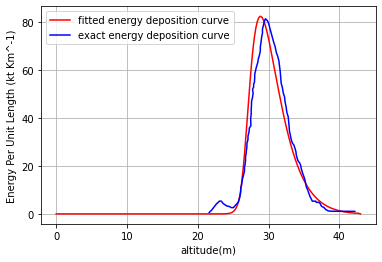

In [3]:
earth = solver.Planet(atmos_func='tabular')
earth.extension2()

Takes roughly 20 seconds to run